In [1]:
#导入包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

train=pd.read_csv('./all/train.csv')
test=pd.read_csv('./all/test.csv')

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#检查缺失值
NAs=pd.concat([train.isnull().sum(),test.isnull().sum()],axis=1,keys=['Train','Test'])
NAs[NAs.sum(axis=1)>0]

,Train,Test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [4]:
#导入评分函数 R2 和 RMSE
def get_score(prediction,labels):
    print('R2:{}'.format(r2_score(prediction,labels)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(prediction,labels))))

def train_test(estimator,x_trn,x_tst,y_trn,y_tst):
    prediction_train=estimator.predict(x_trn)
    print(estimator)
    get_score(prediction_train,y_trn)
    prediction_test=estimator.predict(x_tst)
    print("Test")
    get_score(prediction_test,y_tst)

In [5]:
#分开特征和标签，删除不需要的变量
train_labels=train.pop('SalePrice')
features=pd.concat([train,test],keys=['train','test'])

#删除缺失值超过一半和与房价无关的变量
features.drop(['Utilities','RoofMatl','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 
               'BsmtUnfSF', 'Heating', 'LowQualFinSF','BsmtFullBath', 'BsmtHalfBath',
               'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
               'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],axis=1,inplace=True)
features

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
train 0        1          60       RL         65.0     8450   Pave   NaN   
      1        2          20       RL         80.0     9600   Pave   NaN   
      2        3          60       RL         68.0    11250   Pave   NaN   
      3        4          70       RL         60.0     9550   Pave   NaN   
      4        5          60       RL         84.0    14260   Pave   NaN   
      5        6          50       RL         85.0    14115   Pave   NaN   
      6        7          20       RL         75.0    10084   Pave   NaN   
      7        8          60       RL          NaN    10382   Pave   NaN   
      8        9          50       RM         51.0     6120   Pave   NaN   
      9       10         190       RL         50.0     7420   Pave   NaN   
      10      11          20       RL         70.0    11200   Pave   NaN   
      11      12          60       RL         85.0    11924   Pave   NaN   
      12      13          20       RL          NaN    12968   Pave   NaN   
      13      14          20       RL         91.0    10652   Pave   NaN   
      14      15          20       RL          NaN    10920   Pave   NaN   
      15      16          45       RM         51.0     6120   Pave   NaN   
      16      17          20       RL          NaN    11241   Pave   NaN   
      17      18          90       RL         72.0    10791   Pave   NaN   
      18      19          20       RL         66.0    13695   Pave   NaN   
      19      20          20       RL         70.0     7560   Pave   NaN   
      20      21          60       RL        101.0    14215   Pave   NaN   
      21      22          45       RM         57.0     7449   Pave  Grvl   
      22      23          20       RL         75.0     9742   Pave   NaN   
      23      24         120       RM         44.0     4224   Pave   NaN   
      24      25          20       RL          NaN     8246   Pave   NaN   
      25      26          20       RL        110.0    14230   Pave   NaN   
      26      27          20       RL         60.0     7200   Pave   NaN   
      27      28          20       RL         98.0    11478   Pave   NaN   
      28      29          20       RL         47.0    16321   Pave   NaN   
      29      30          30       RM         60.0     6324   Pave   NaN   
...          ...         ...      ...          ...      ...    ...   ...   
test  1429  2890          30       RM         50.0     7030   Pave   NaN   
      1430  2891          50       RM         75.0     9060   Pave   NaN   
      1431  2892          30  C (all)         69.0    12366   Pave   NaN   
      1432  2893         190  C (all)         50.0     9000   Pave   NaN   
      1433  2894          50  C (all)         60.0     8520   Grvl   NaN   
      1434  2895         120       RM         41.0     5748   Pave   NaN   
      1435  2896         120       RM         44.0     3842   Pave   NaN   
      1436  2897          20       RL         69.0    23580   Pave   NaN   
      1437  2898          90       RL         65.0     8385   Pave   NaN   
      1438  2899          20       RL         70.0     9116   Pave   NaN   
      1439  2900          80       RL        140.0    11080   Pave   NaN   
      1440  2901          20       RL          NaN    50102   Pave   NaN   
      1441  2902          20       RL          NaN     8098   Pave   NaN   
      1442  2903          20       RL         95.0    13618   Pave   NaN   
      1443  2904          20       RL         88.0    11577   Pave   NaN   
      1444  2905          20      NaN        125.0    31250   Pave   NaN   
      1445  2906          90       RM         78.0     7020   Pave   NaN   
      1446  2907         160       RM         41.0     2665   Pave   NaN   
      1447  2908          20       RL         58.0    10172   Pave   NaN   
      1448  2909          90       RL          NaN    11836   Pave   NaN   
      1449  2910         180       RM         21.0     1470   

In [6]:
#填补缺失值和转换特征
features['MSSubClass']=features['MSSubClass'].astype(str)
features.OverallCond=features.OverallCond.astype(str)
features['KitchenAbbGr']=features['KitchenAbvGr'].astype(str)
features['YrSold']=features['YrSold'].astype(str)
features['MoSold']=features['MoSold'].astype(str)

features['MSZoning']=features['MSZoning'].fillna(features['MSZoning'].mode()[0])
features['MasVnrType']=features['MasVnrType'].fillna(features['MasVnrType'].mode()[0])
features['Electrical']=features['Electrical'].fillna(features['Electrical'].mode()[0])
features['KitchenQual']=features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
features['SaleType']=features['SaleType'].fillna(features['SaleType'].mode()[0])

features['LotFrontage']=features['LotFrontage'].fillna(features['LotFrontage'].mean())

features['Alley']=features['Alley'].fillna('NOACCESS')
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    features[col]=features[col].fillna('NoBSMT')
features['FireplaceQu']=features['FireplaceQu'].fillna('NoFP')
for col in ('GarageType','GarageFinish','GarageQual'):
    features[col]=features[col].fillna('NoGRG')

features['TotalBsmtSF']=features['TotalBsmtSF'].fillna(0)
features['GarageCars']=features['GarageCars'].fillna(0.0)


In [7]:
#加入总楼层数特征，去掉1楼2楼地下室特征
features['TotalSF']=features['TotalBsmtSF']+features['1stFlrSF']+features['2ndFlrSF']
features.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1,inplace=True)

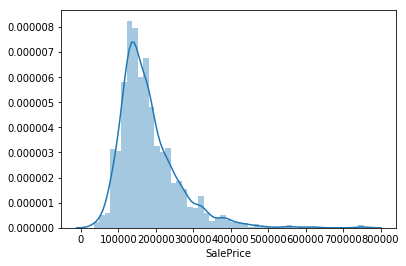

In [8]:
ax=sns.distplot(train_labels)

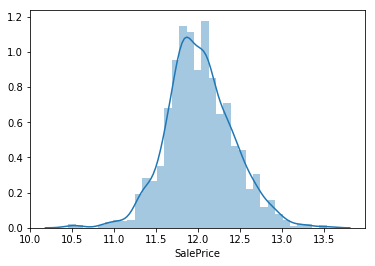

In [9]:
#log转换
train_labels=np.log(train_labels)
ax=sns.distplot(train_labels)

In [10]:
#标准化数据值
numeric_features=features.loc[:,['LotFrontage','LotArea','GrLivArea','TotalSF']]
numeric_features_standardized=(numeric_features - numeric_features.mean()) / numeric_features.std()


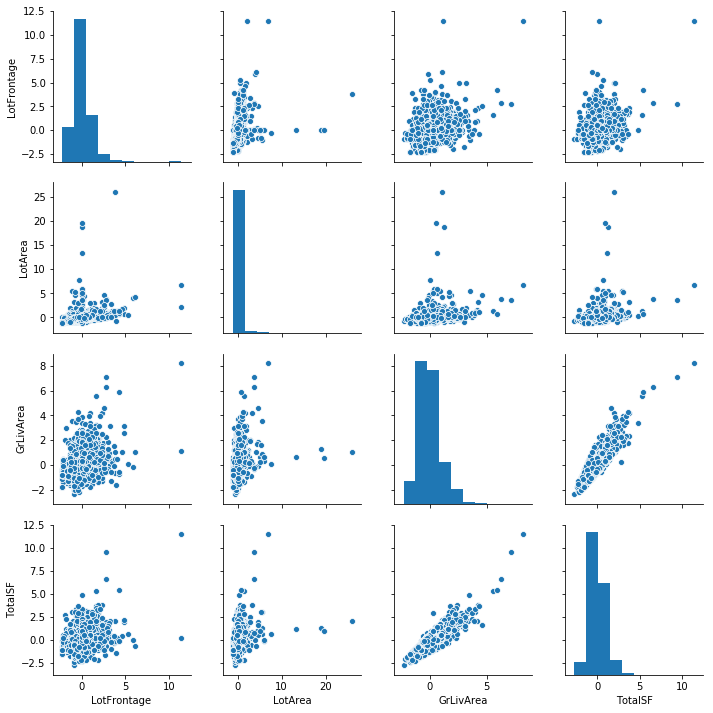

In [11]:
ax=sns.pairplot(numeric_features_standardized)

In [12]:
#converting categorical data to dummies
#将类别特征转换为独热编码
conditions=set([x for x in features['Condition1']]+[x for x in features['Condition2']])
dummies=pd.DataFrame(data=np.zeros((len(features.index),len(conditions))), index=features.index, columns=conditions)
for i, cond in enumerate(zip(features['Condition1'],features['Condition2'])):
    dummies.ix[i,cond]=1
features=pd.concat([features,dummies.add_prefix('Condition_')],axis=1)
features.drop(['Condition1','Condition2'],axis=1,inplace=True)

exteriors=set([x for x in features['Exterior1st']]+[x for x in features['Exterior2nd']])
dummies=pd.DataFrame(data=np.zeros((len(features.index),len(exteriors))), index=features.index, columns=exteriors)
for i, ext in enumerate(zip(features['Exterior1st'],features['Exterior2nd'])):
    dummies.ix[i,ext]=1
features=pd.concat([features,dummies.add_prefix('Exterior_')],axis=1)
features.drop(['Exterior1st','Exterior2nd','Exterior_nan'],axis=1,inplace=True)

for col in features.dtypes[features.dtypes=='object'].index:
    for_dummy=features.pop(col)
    features=pd.concat([features,pd.get_dummies(for_dummy,prefix=col)],axis=1)

In [13]:
##
features_standardized=features.copy()
features_standardized.update(numeric_features_standardized)

In [14]:
##分开训练集和测试集
train_features=features.loc['train'].drop('Id',axis=1).select_dtypes(include=[np.number]).values
test_features=features.loc['test'].drop('Id',axis=1).select_dtypes(include=[np.number]).values

train_features_st = features_standardized.loc['train'].drop('Id',axis=1).select_dtypes(include=[np.number]).values
test_features_st = features_standardized.loc['test'].drop('Id',axis=1).select_dtypes(include=[np.number]).values


In [15]:
##分离训练集和验证集
train_features_st, train_features, train_labels = shuffle(train_features_st, train_features, train_labels, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.1, random_state=200)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(train_features_st, train_labels, test_size=0.1, random_state=200)


In [16]:
#Elastic Net
ENSTest = linear_model.ElasticNetCV(
    alphas=[0.0001,0.0005,0.001,0.01,0.1,1,10],
    l1_ratio=[.01,.1,.5,.9,.99],max_iter=5000).fit(X_train_st,y_train_st)
train_test(ENSTest,X_train_st,X_test_st,y_train_st,y_test_st)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2:0.9009513375865374
RMSE:0.11920123426991182
Test
R2:0.8968056111359844
RMSE:0.11092797761247919


In [17]:
scores = cross_val_score(ENSTest, train_features_st, train_labels, cv=5)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.87 (+/- 0.10)


In [18]:
#Gradient Boosting
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000,
                                           learning_rate=0.05,
                                           max_depth=3,
                                           max_features='sqrt',
                                           min_samples_leaf=15,
                                           min_samples_split=10,
                                           loss='huber').fit(X_train,y_train)
train_test(GBest,X_train,X_test,y_train,y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2:0.9628412795987541
RMSE:0.07492862150637238
Test
R2:0.908394328476814
RMSE:0.10435331583779893


In [20]:
scores = cross_val_score(GBest,train_features_st,train_labels,cv=5)
print("Accurary: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accurary: 0.90 (+/- 0.04)


In [21]:
#融合模型
GB_model = GBest.fit(train_features, train_labels)
ENST_model = ENSTest.fit(train_features_st, train_labels)

Final_labels = (np.exp(GB_model.predict(test_features)) + np.exp(ENST_model.predict(test_features_st)))/2

pd.DataFrame({'Id':test.Id,'SalePrice':Final_labels}).to_csv('2018-9-4.csv', index=False)